# Basic example for using AeroMAPS with Jupyter Notebook

This document represents both an example and a tutorial for using the basic functions of AeroMAPS to simulate and evaluate a transition scenario for the aviation sector.  It is written in the form of a Jupyter Notebook to facilitate its use. The user will be able to adapt this notebook and couple it with other notebooks proposed in the documentation.

## Load and process

First, the user has to load the framework and generate a process.

In [1]:
%matplotlib widget
from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_top_down,
    models_energy_without_fuel_effect,
    models_offset,
    models_climate_gwpstar,
    models_sustainability,
    models_energy_cost_simple,
    models_operation_cost_top_down,
)

In [2]:
models = {
    "models_traffic": models_traffic,
    "models_efficiency_top_down": models_efficiency_top_down,
    "models_energy_without_fuel_effect": models_energy_without_fuel_effect,
    "models_offset": models_offset,
    "models_climate_gwpstar": models_climate_gwpstar,
    "models_sustainability": models_sustainability,
    "models_energy_cost_simple": models_energy_cost_simple,
    "models_operation_cost_top_down": models_operation_cost_top_down,
}

In [3]:
process = create_process(models=models)

In [4]:
process.config["OUTPUTS_JSON_DATA_FILE"] = "./outputs.json"

## Set up variables

The user can then set the different parameters of the model to generate its scenario. The list of the float inputs can be displayed using this command.

In [5]:
# process.list_float_inputs()

 In the following, some main parameters are for instance set up.

In [6]:
# Air traffic evolution

## Growth rate by category [%]
process.parameters.cagr_passenger_short_range_reference_periods = [2020, 2030, 2040, 2050]
process.parameters.cagr_passenger_short_range_reference_periods_values = [3.0, 2.0, 1.0]
process.parameters.cagr_passenger_medium_range_reference_periods = []
process.parameters.cagr_passenger_medium_range_reference_periods_values = [3.0]
process.parameters.cagr_passenger_long_range_reference_periods = []
process.parameters.cagr_passenger_long_range_reference_periods_values = [3.0]
process.parameters.cagr_freight_reference_periods = []
process.parameters.cagr_freight_reference_periods_values = [3.0]

In [7]:
# Aircraft fleet and operation evolution - Aircraft load factor

## Aircraft load factor in 2050 [%]
process.parameters.load_factor_end_year = 85.0  # 2019 value: 82.399312

In [8]:
# Aircraft fleet and operation evolution - Aircraft efficiency using the top-down approach

## Drop-in aircraft
### Mean annual efficiency gains by category [%]
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_short_range_dropin_fuel_gain_reference_years_values = [1.5]
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_medium_range_dropin_fuel_gain_reference_years_values = [1.5]
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years = []
process.parameters.energy_per_ask_long_range_dropin_fuel_gain_reference_years_values = [1.5]

## Hydrogen aircraft
### Values for setting logistic functions by category
process.parameters.hydrogen_final_market_share_short_range = 50.0  # [%]
process.parameters.hydrogen_introduction_year_short_range = 2035
process.parameters.fleet_renewal_duration = 20.0
### Relative energy consumption for hydrogen aircraft with respect to drop-in aircraft [%]
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years = []
process.parameters.relative_energy_per_ask_hydrogen_wrt_dropin_short_range_reference_years_values = [
    1.0
]

In [9]:
# Aircraft fleet and operation evolution - Operations

## Values for setting the logistic function
process.parameters.operations_final_gain = 8.0  # [%]
process.parameters.operations_start_year = 2025
process.parameters.operations_duration = 25.0

In [10]:
# Aircraft energy - Introduction of alternative drop-in fuels

## Share of alternative fuels in the drop-in fuel mix (the rest being supplemented by kerosene) [%]
process.parameters.biofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_share_reference_years_values = [0.0, 4.8, 24.0, 35.0]
process.parameters.electrofuel_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electrofuel_share_reference_years_values = [0.0, 1.2, 10.0, 35.0]

In [11]:
# Carbon offset
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods = [2020, 2024, 2050]
process.parameters.carbon_offset_baseline_level_vs_2019_reference_periods_values = [100.0, 85.0]
process.parameters.residual_carbon_offset_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.residual_carbon_offset_share_reference_years_values = [0.0, 0.0, 20.0, 50.0]

In [12]:
# Environmental limits

## Carbon budgets and Carbon Dioxide Removal [GtCO2]
process.parameters.net_carbon_budget = 850.0
process.parameters.carbon_dioxyde_removal_2100 = 280.0

## Available energy resources in 2050 [EJ]
process.parameters.waste_biomass = 12.0
process.parameters.crops_biomass = 63.0
process.parameters.forest_residues_biomass = 17.0
process.parameters.agricultural_residues_biomass = 57.0
process.parameters.algae_biomass = 15.0
process.parameters.available_electricity = 250.0

In [13]:
# Allocation settings

## Aviation share of the global (equivalent) carbon budget [%]
process.parameters.aviation_carbon_budget_allocated_share = 2.6
process.parameters.aviation_equivalentcarbonbudget_allocated_share = 5.1

## Aviation share of the global energy resources (biomass and electricity) [%]
process.parameters.aviation_biomass_allocated_share = 5.0
process.parameters.aviation_electricity_allocated_share = 5.0

In [14]:
# Various environmental settings

## Share of biofuel production pathways (the rest being completed by AtJ processes) [%]
process.parameters.biofuel_hefa_fog_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_fog_share_reference_years_values = [100, 100, 0.7, 0.7]
process.parameters.biofuel_hefa_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_hefa_others_share_reference_years_values = [0.0, 0.0, 3.8, 3.8]
process.parameters.biofuel_ft_others_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_others_share_reference_years_values = [0.0, 0.0, 76.3, 76.3]
process.parameters.biofuel_ft_msw_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.biofuel_ft_msw_share_reference_years_values = [0.0, 0.0, 7.4, 7.4]

## Emission factors for electricity (2019 value: 429 gCO2/kWh)
process.parameters.electricity_emission_factor_reference_years = [2020, 2030, 2040, 2050]
process.parameters.electricity_emission_factor_reference_years_values = [429.0, 200.0, 100.0, 30.0]

## Share of hydrogen production pathways (the rest being completed by production via coal without CCS) [%]
## Distribution in 2019: Gas without CCS (71%), Coal without CCS (27%), Electrolysis (2%), Others with CCS (0%), Co-products not taken into account
process.parameters.hydrogen_electrolysis_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_electrolysis_share_reference_years_values = [2, 100, 100, 100]
process.parameters.hydrogen_gas_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_coal_ccs_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_coal_ccs_share_reference_years_values = [0, 0, 0, 0]
process.parameters.hydrogen_gas_share_reference_years = [2020, 2030, 2040, 2050]
process.parameters.hydrogen_gas_share_reference_years_values = [71, 0, 0, 0]

## Compute

Once all the parameters have been set up, the user can compute.

In [15]:
process.compute()
process.write_json()

## Results

The user can then display the results. The user has access to float outputs but also to annual data outputs, with the possibility of choosing the output.

In [16]:
process.data["float_outputs"]

{'cagr_rpk_short_range': 1.5291534592603684,
 'cagr_rpk_medium_range': 2.5948580077686634,
 'cagr_rpk_long_range': 2.5948580077686634,
 'cagr_rpk': 2.3354016834591818,
 'prospective_evolution_rpk_short_range': 57.66051931881593,
 'prospective_evolution_rpk_medium_range': 115.65912675438427,
 'prospective_evolution_rpk_long_range': 115.65912675438427,
 'prospective_evolution_rpk': 99.8835055319097,
 'cagr_rtk': 2.5948580077686634,
 'prospective_evolution_rtk': 115.65912675438419,
 'biomass_consumption_end_year': 9.605453845892908,
 'electricity_consumption_end_year': 13.08927741936231,
 'gross_carbon_budget': 1130.0,
 'gross_carbon_budget_2050': 797.2411428790518,
 'aviation_carbon_budget': 20.72826971485535,
 'equivalent_gross_carbon_budget': 1574.4444444444443,
 'equivalent_gross_carbon_budget_2050': 1102.610171118651,
 'aviation_equivalent_carbon_budget': 56.23311872705119,
 'solid_waste_biomass': 11.0,
 'oil_crops_biomass': 5.67,
 'sugarystarchy_crops_biomass': 17.64,
 'lignocellulo

In [17]:
process.data["vector_outputs"]

,rpk_short_range_measures_impact,rpk_medium_range_measures_impact,rpk_long_range_measures_impact,rpk_short_range,rpk_medium_range,rpk_long_range,annual_growth_rate_passenger_short_range,annual_growth_rate_passenger_medium_range,annual_growth_rate_passenger_long_range,rpk,annual_growth_rate_passenger,rpk_reference,reference_annual_growth_rate_passenger,total_aircraft_distance_dropin_fuel,total_aircraft_distance_hydrogen,total_aircraft_distance_electric,rtk,annual_growth_rate_freight,rtk_reference,reference_annual_growth_rate_freight,ask,ask_short_range,ask_medium_range,ask_long_range,load_factor,operations_gain,operations_contrails_gain,operations_contrails_overconsumption,energy_per_ask_without_operations_short_range_dropin_fuel,energy_per_ask_without_operations_medium_range_dropin_fuel,energy_per_ask_without_operations_long_range_dropin_fuel,energy_per_ask_short_range_dropin_fuel_gain,energy_per_ask_medium_range_dropin_fuel_gain,energy_per_ask_long_range_dropin_fuel_gain,relative_energy_per_ask_hydrogen_wrt_dropin_short_range,relative_energy_per_ask_hydrogen_wrt_dropin_medium_range,relative_energy_per_ask_hydrogen_wrt_dropin_long_range,energy_per_ask_without_operations_short_range_hydrogen,energy_per_ask_without_operations_medium_range_hydrogen,energy_per_ask_without_operations_long_range_hydrogen,relative_energy_per_ask_electric_wrt_dropin_short_range,relative_energy_per_ask_electric_wrt_dropin_medium_range,relative_energy_per_ask_electric_wrt_dropin_long_range,energy_per_ask_without_operations_short_range_electric,energy_per_ask_without_operations_medium_range_electric,energy_per_ask_without_operations_long_range_electric,ask_short_range_hydrogen_share,ask_medium_range_hydrogen_share,ask_long_range_hydrogen_share,ask_short_range_hydrogen,ask_medium_range_hydrogen,ask_long_range_hydrogen,ask_short_range_electric_share,ask_medium_range_electric_share,ask_long_range_electric_share,ask_short_range_electric,ask_medium_range_electric,ask_long_range_electric,ask_short_range_dropin_fuel_share,ask_medium_range_dropin_fuel_share,ask_long_range_dropin_fuel_share,ask_short_range_dropin_fuel,ask_medium_range_dropin_fuel,ask_long_range_dropin_fuel,ask_dropin_fuel,ask_hydrogen,ask_electric,energy_per_rtk_without_operations_freight_dropin_fuel,rtk_hydrogen_share,rtk_dropin_fuel_share,rtk_hydrogen,rtk_dropin_fuel,energy_per_rtk_without_operations_freight_hydrogen,energy_per_rtk_without_operations_freight_electric,energy_per_ask_short_range_dropin_fuel,...,electricity_direct_use_carbon_tax_kWh,co2_market_price,carbon_tax,dropin_marginal_mfsp,dropin_mean_mfsp,dropin_mfsp_carbon_tax_supplement,discounted_energy_expenses,non_discounted_energy_expenses,non_discounted_BAU_energy_expenses,non_discounted_full_kero_energy_expenses,load_factor_cost_non_energy_per_ask,operational_efficiency_cost_non_energy_per_ask,doc_energy_per_ask_long_range_dropin_fuel,doc_energy_per_ask_long_range_hydrogen,doc_energy_per_ask_long_range_electric,doc_energy_per_ask_long_range_mean,doc_energy_per_ask_medium_range_dropin_fuel,doc_energy_per_ask_medium_range_hydrogen,doc_energy_per_ask_medium_range_electric,doc_energy_per_ask_medium_range_mean,doc_energy_per_ask_short_range_dropin_fuel,doc_energy_per_ask_short_range_hydrogen,doc_energy_per_ask_short_range_electric,doc_energy_per_ask_short_range_mean,doc_energy_per_ask_mean,doc_total_per_ask_short_range_dropin_fuel,doc_total_per_ask_medium_range_dropin_fuel,doc_total_per_ask_long_range_dropin_fuel,doc_total_per_ask_short_range_hydrogen,doc_total_per_ask_medium_range_hydrogen,doc_total_per_ask_long_range_hydrogen,doc_total_per_ask_short_range_electric,doc_total_per_ask_medium_range_electric,doc_total_per_ask_long_range_electric,doc_total_per_ask_short_range_mean,doc_total_per_ask_medium_range_mean,doc_total_per_ask_long_range_mean,doc_total_per_ask_mean,doc_carbon_tax_lowering_offset_per_ask_mean,doc_carbon_tax_per_ask_long_range_dropin_fuel,doc_carbon_tax_per_ask_long_range_hydrogen,doc_carbon_tax_per_ask_long_range_mea

In [18]:
process.data["climate_outputs"][["co2_emissions"]]

,co2_emissions
1940,35.135888
1941,37.952826
1942,40.986452
1943,44.269269
1944,47.812110
1945,51.636646
1946,55.764544
1947,60.228308
1948,65.038772
1949,70.250107


The user can write the results to an Excel file with the following command.

In [19]:
process.write_excel(file_name="aeromaps_data.xlsx")

IndexError: At least one sheet must be visible

## Plots

Lastly, the user can also plot different parameters based on a database of plots. The list of the available plots can be displayed using the following command.

In [ ]:
process.list_available_plots()

['air_transport_co2_emissions',
 'air_transport_climate_impacts',
 'carbon_budget_assessment',
 'equivalent_carbon_budget_assessment',
 'biomass_resource_budget_assessment',
 'electricity_resource_budget_assessment',
 'multidisciplinary_assessment',
 'temperature_increase_from_air_transport',
 'detailed_temperature_increase_from_air_transport',
 'biomass_consumption',
 'electricity_consumption',
 'co2_per_rpk',
 'co2_per_rtk',
 'passenger_kaya_factors',
 'freight_kaya_factors',
 'levers_of_action_distribution',
 'revenue_passenger_kilometer',
 'revenue_tonne_kilometer',
 'available_seat_kilometer',
 'total_aircraft_distance',
 'load_factor',
 'energy_per_ask',
 'energy_per_rtk',
 'energy_consumption',
 'fuel_consumption_liter_per_pax_100km',
 'mean_fuel_emission_factor',
 'emission_factor_per_fuel',
 'dropin_fuel_shares',
 'cumulative_co2_emissions',
 'direct_h2o_emissions',
 'direct_nox_emissions',
 'direct_sulfur_emissions',
 'direct_soot_emissions',
 'carbon_offset',
 'cumulative_ca

The user can thus display a figure of this list, for instance the CO<sub>2</sub> emissions of the simulated scenario.

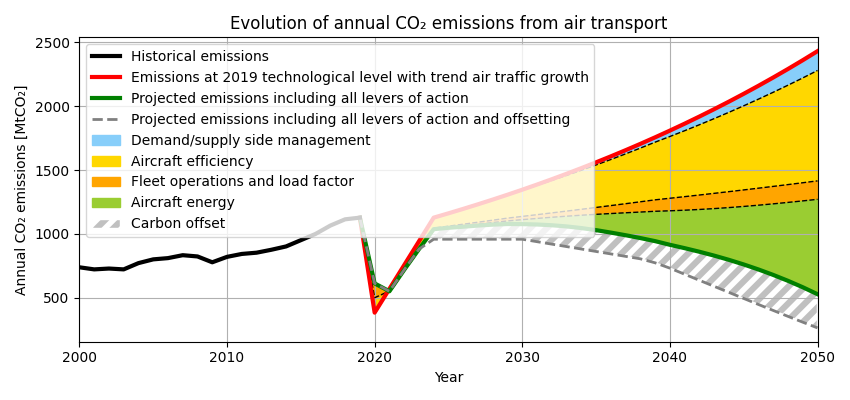

In [ ]:
process.plot("air_transport_co2_emissions", save=False)

In [ ]:
process.data["vector_outputs"][["electricity_emission_factor"]]

,electricity_emission_factor
2000,NaN
2001,NaN
2002,NaN
2003,NaN
2004,NaN
2005,NaN
2006,NaN
2007,NaN
2008,NaN
2009,NaN


In [ ]:
# Verify the outputs between .outputs.json and data/reference/outputs.json
from aeromaps.utils.functions import compare_json_files

files_are_different = compare_json_files(
    "./outputs.json",
    "./data/reference/outputs.json",
    rtol=0.00005,
    atol=0.1,
)

if files_are_different:
    raise ValueError("The outputs.json files are different.")

No differences found.
